# Page View Time Series Visualizer

In [101]:
# External imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [102]:
# Get data from the fcc-forum-pageviews.csv file
df = pd.read_csv("fcc-forum-pageviews.csv").set_index("date")
df.index = pd.DatetimeIndex(df.index)

df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


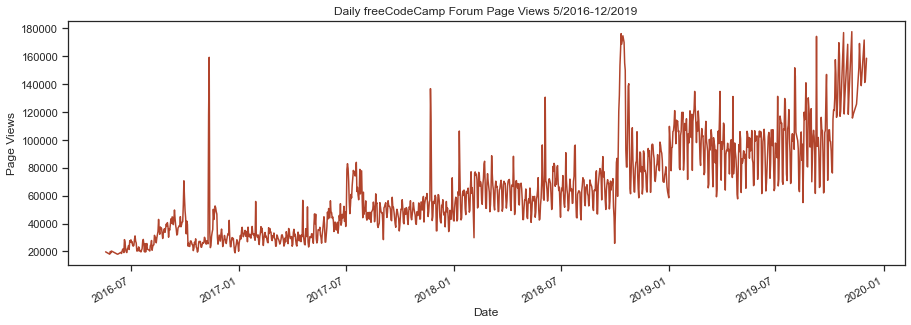

In [103]:
# Filter and plot the time series
per_025 = df.value.quantile(0.025)
per_975 = df.value.quantile(0.975)
df = df.query("(value > @per_025) & (value < @per_975)")

g = df.plot(legend=None, figsize=(15,5),color="#B1442C")
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019");
plt.xlabel("Date");plt.ylabel("Page Views");

In [104]:
# Create the appropiate DataFrame for the second analysis
pd.set_option('mode.chained_assignment', None) # Disable the warnnings
df["month"] = df.index.month; df["year"] = df.index.year;
df.head()

,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016


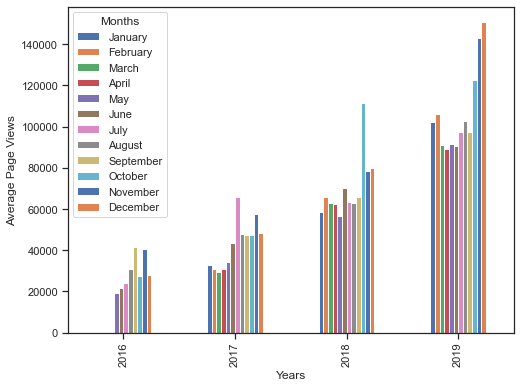

In [105]:
# Plot the information of the DataFrame just created
df_bar = df.pivot_table("value", index="year", columns="month").plot(kind="bar", figsize=(8,6))
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
plt.xlabel("Years");plt.ylabel("Average Page Views"); plt.legend(months, title="Months");

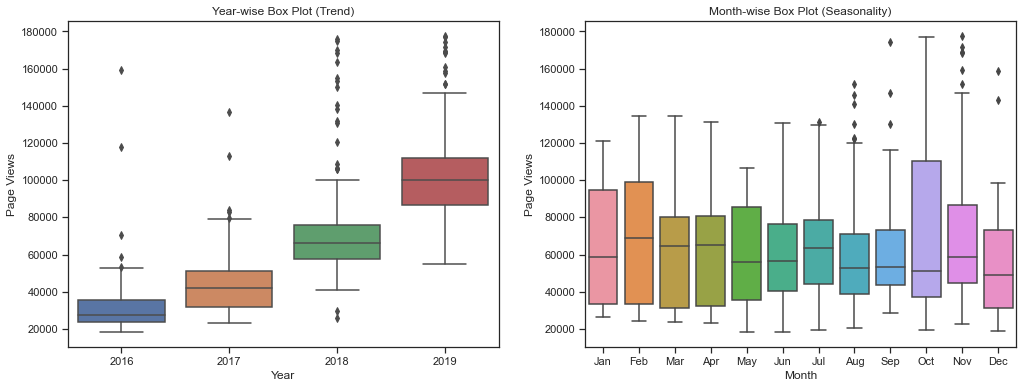

In [134]:
# Plot the boxplots
fig, ax = plt.subplots(1, 2, figsize=(17, 6))
g1 = sns.boxplot(ax=ax[0], x="year", y="value", data=df, dodge=False)
g2 = sns.boxplot(ax=ax[1], x="month", y="value", data=df, dodge=False)
ax[0].set_title("Year-wise Box Plot (Trend)"); ax[0].set(xlabel="Year", ylabel="Page Views");

month_short = [x[:3] for x in months]
ax[1].set_title("Month-wise Box Plot (Seasonality)"); ax[1].set(xlabel="Month", ylabel="Page Views");

def format_func(value, tick_number):
    return month_short[value]
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(format_func))